In [3]:
from scipy.integrate import odeint
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
import math

In [12]:
# Derivatives Function
def derivatives(x, τ):
    """
    Arguments:  x – a list of the current values of θ and θdot.
                τ – dimensionless time at which to compute θdot and θ-double-dot.
    Returns:    A list containing θdot and θ-double-dot at τ.
    """
    θ, θdot = x
    dxdt = [θdot, ((-2 * (α / l) * np.cos(τ) * x[1] - np.sin(x[0]) * (ω0 / ω)**2) / (1 + (α / l) * np.sin(τ)))]
    return dxdt

In [13]:
# Parameters we'll need
ω = 1
g = 9.81
l = 2
α = 1
ω0 = np.sqrt(g / l)

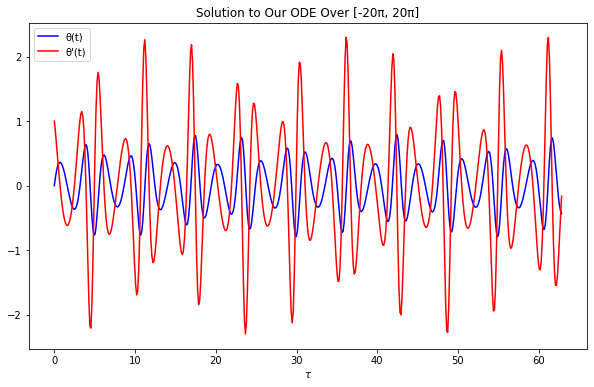

In [17]:
# Define range of τ values
τ = np.linspace(0, 20 * np.pi, 500)

# Define initial conditions
x0 = [0, 1]

# Solve the ODE on the positive intervals [0, 10] and [-10, 0]
solPos = odeint(derivatives, x0, τ)

# Define plot timensions
plt.figure(figsize = (10, 6))

# Plot solution to the ODE
plt.plot(τ, solPos[:, 0], 'b-', label = "θ(t)")
plt.plot(τ, solPos[:, 1], 'r-', label = "θ'(t)")
plt.title("Solution to Our ODE Over [-20π, 20π]")
plt.xlabel("$τ$")
plt.legend();


In [ ]:
#New Code (Nikolas) (Don't Modify Yet)

from scipy.integrate import odeint
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
import math

# Relevant Parameters:
ω = 1       # Frequency of oscillations in length
g = 9.81    # Gravitational acceleration
l = 3       # Pendulum base length
α = 1       # Amplitude of oscillations in length
ω0 = np.sqrt(g / l)   # Frequency of simple pendulum (no oscillation in length)


def θ_derivatives(x, τ):
    """
    Arguments:  x – a list of the current values of θ and θdot.
                τ – dimensionless time at which to compute θdot and θ-double-dot.
    Returns:    A list containing θdot and θ-double-dot at τ.
    """
    θ, θdot = x
    return [θdot, ((-2 * (α / l) * np.cos(τ) * θdot - np.sin(θ) * (ω0 / ω)**2) / (1 + (α / l) * np.sin(τ)))]


# Define range of τ values
time = np.linspace(0, 50, 500)
timeneg = np.linspace(0, -5, 500)

# Define initial conditions
θi = [0, 0.5]

# Solve the ODE on our positive τ-interval
position, velocity = odeint(θ_derivatives, θi, time).T
plt.plot(time, position, 'orange', linewidth = 2)

# For negative direction, go opposite way with time
position, velocity = odeint(θ_derivatives, θi, timeneg).T
plt.plot(timeneg, position, 'orange', linewidth = 2)

# Plot θ vs τ
plt.xlabel('Dimensionless time (τ)')
plt.ylabel('θ (radians)')
plt.title("")
plt.ticklabel_format(style='sci', axis='x')
#, scilimits=(0,0)

plt.axis((-5, 50, -2,2)) #Change range of data
plt.grid(True)